#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**

## **Weather Forecasting using simple RNN (Vanilla RNN)**

### **Step 1: Load and preproces the data**

In [1]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
# Load the training data from the provided URL, parsing the 'date' column as dates and setting it as the index
train_url = "https://raw.githubusercontent.com/sayande01/Weather_Forecasting_ML/main/DailyDelhiClimateTrain.csv"
train_data = pd.read_csv(train_url, parse_dates=["date"], index_col="date")

# Load the test data from the provided URL, parsing the 'date' column as dates and setting it as the index
test_url = "https://raw.githubusercontent.com/sayande01/Weather_Forecasting_ML/main/DailyDelhiClimateTest.csv"
test_data = pd.read_csv(test_url, parse_dates=["date"], index_col="date")


In [3]:
# print the train and test data
print(train_data)
print(test_data)

             meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500

In [4]:
# print the info of the datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


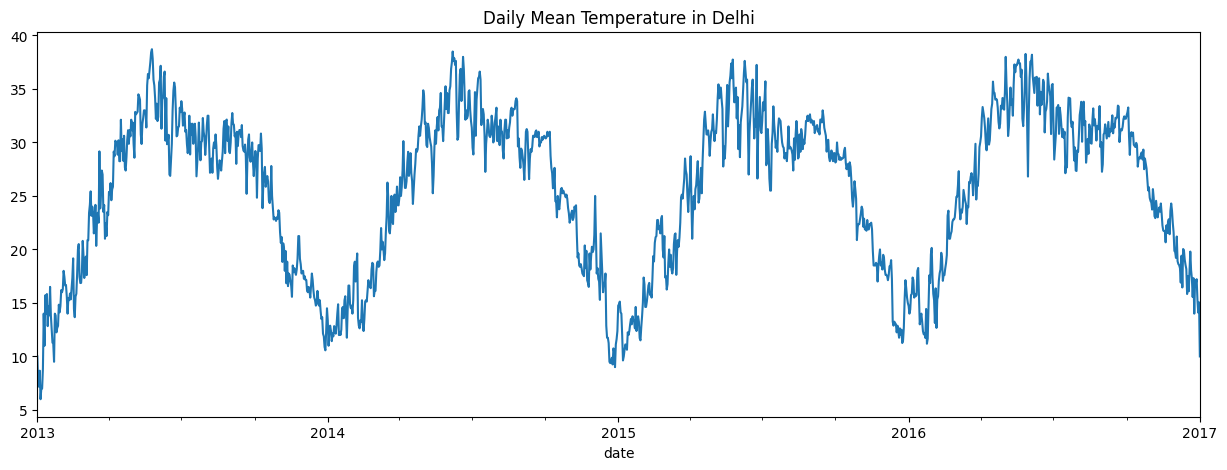

In [5]:
# Plot the daily mean temperature in Delhi
train_data["meantemp"].plot(figsize=(15, 5), title="Daily Mean Temperature in Delhi")
plt.show()


### **2. Normalize Data**

In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train_data["meantemp"].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data["meantemp"].values.reshape(-1, 1))

### **3. Prepare sequence data of RNN**

In [7]:
# Function to prepare the data for RNN by creating sequences
def create_sequence(data, n_timesteps):
    X, y = [], []  # Initialize empty lists to store the sequences and labels
    for i in range(len(data) - n_timesteps):
        # Create input sequences by taking n_timesteps from the data
        X.append(data[i: i + n_timesteps])
        # The target is the next value after the sequence
        y.append(data[i + n_timesteps])
    return np.array(X), np.array(y)  # Convert lists to numpy arrays for efficient processing

# Set the number of timesteps for the RNN (i.e., the sequence length)
n_timesteps = 10

# Prepare the training data by creating sequences with n_timesteps
X_train, y_train = create_sequence(train_scaled, n_timesteps)

# Prepare the testing data by creating sequences with n_timesteps
X_test, y_test = create_sequence(test_scaled, n_timesteps)


### **4. Define the model and train the model**

In [8]:
# Initialize the RNN model
model = Sequential()

# Add a SimpleRNN layer with 50 units
# input_shape = (n_timesteps, 1) indicates that each input sequence will have 'n_timesteps' time steps and 1 feature
model.add(SimpleRNN(units=50, input_shape=(n_timesteps, 1)))

# Add a Dense output layer with 1 unit (for regression task, since we're predicting a single value)
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model with Adam optimizer and mean squared error (mse) as the loss function for regression
model.compile(optimizer="Adam", loss="mse")

# Train the model with training data
# Validation split of 0.2 means 20% of the training data will be used for validation
# Epochs = 20: The model will be trained for 20 iterations over the dataset
# Batch size = 32: The model will update weights after processing 32 samples at a time
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0133 - val_loss: 0.0039
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 -

### **5. Evaluate mode**

In [10]:
# evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Test loss: 0.0025631426833570004


### **6. Make the predictions**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


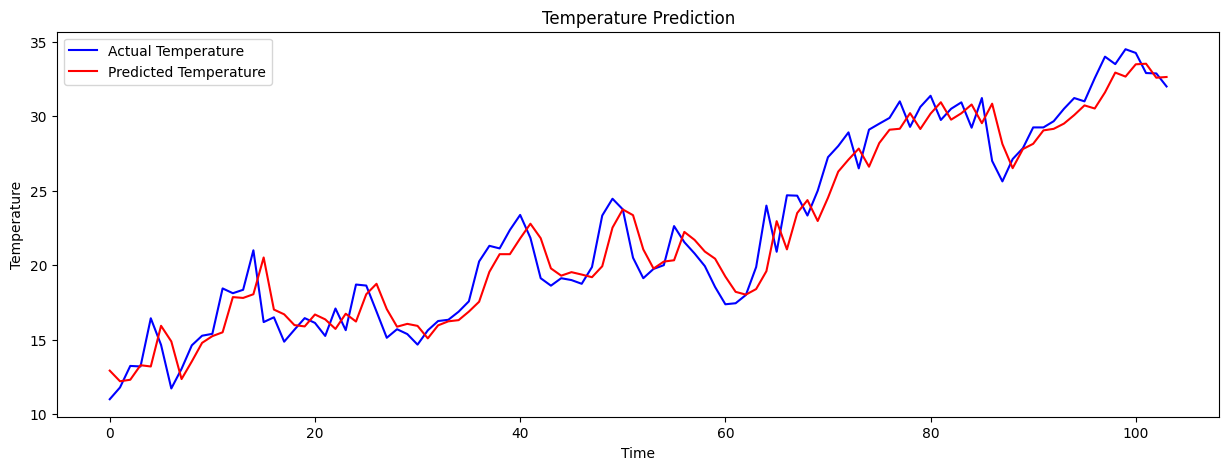

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and the true values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(y_test_inverse, color='blue', label='Actual Temperature')
plt.plot(y_pred_inverse, color='red', label='Predicted Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### **7. Future predictions**

In [15]:
# Define a function to predict future values
def predict_future(model, data, n_future_steps, n_timesteps):
    future_predictions = []  # List to store future predictions
    # Initialize the current input with the last 'n_timesteps' from the test data
    current_input = data[-n_timesteps:].reshape(1, n_timesteps, 1)

    for _ in range(n_future_steps):
        # Predict the next value based on the current input
        future_pred = model.predict(current_input)[0]
        # Append the predicted value to the list of future predictions
        future_predictions.append(future_pred)
        # Update the input for the next prediction by removing the oldest time step and adding the new prediction
        current_input = np.append(current_input[:, 1:, :], [[future_pred]], axis=1)

    return np.array(future_predictions)  # Return future predictions as a numpy array

n_future_steps = 30  # Set the number of days to predict into the future

# Predict future values using the model and test data
future_predictions_scaled = predict_future(model, test_scaled, n_future_steps, n_timesteps)

# Inverse transform the scaled predictions back to the original scale
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# Generate future dates starting from the last date in the test data
last_date = test_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_future_steps + 1, inclusive='right')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

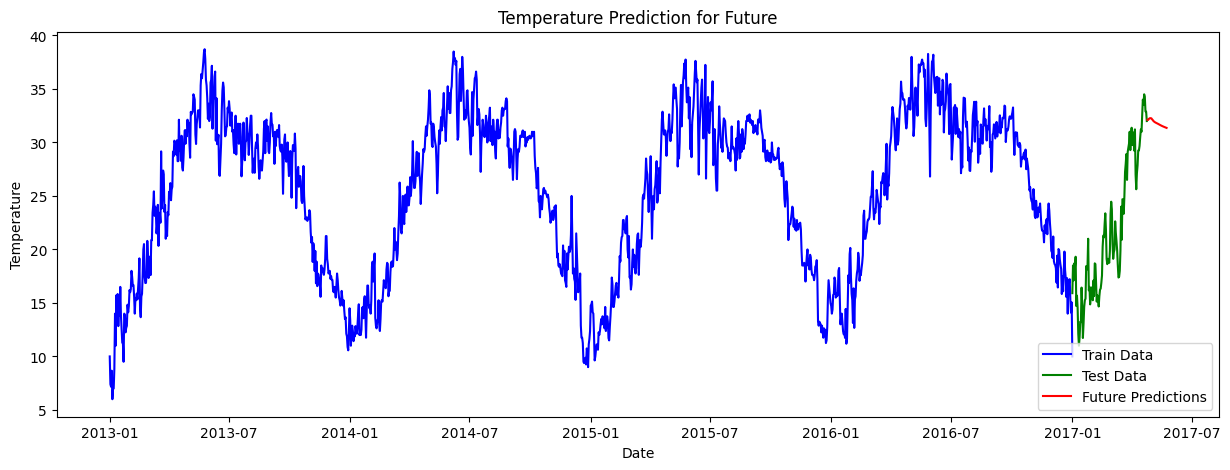

In [16]:
# Plot the results: train data, test data, and future predictions
plt.figure(figsize=(15, 5))

# Plot the training data in blue
plt.plot(train_data.index, train_data["meantemp"], color='blue', label='Train Data')

# Plot the test data in green
plt.plot(test_data.index, test_data["meantemp"], color='green', label='Test Data')

# Plot the future predictions in red
plt.plot(future_dates, future_predictions, color='red', label='Future Predictions')

# Add title and labels to the plot
plt.title('Temperature Prediction for Future')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Display the legend
plt.legend()

# Show the plot
plt.show()